In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [10]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.4609940491662866)

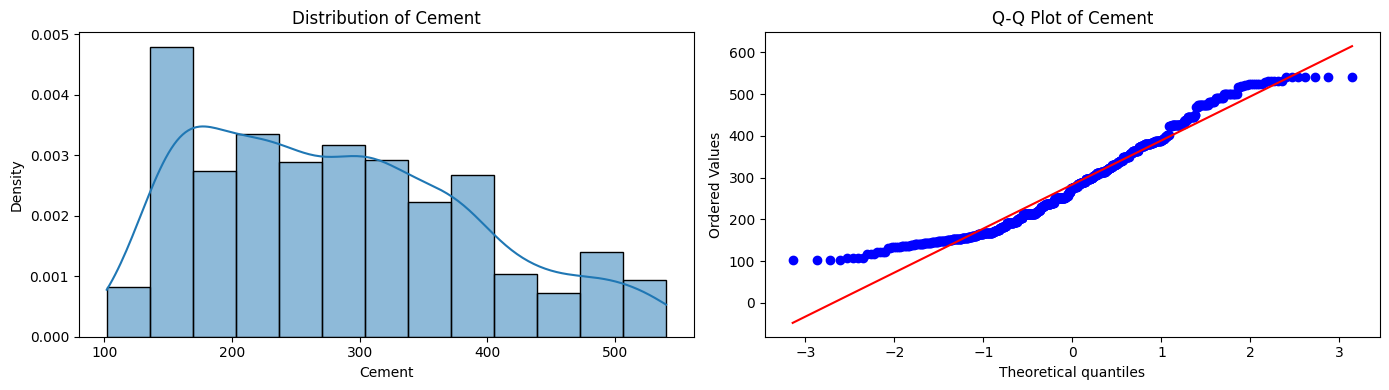

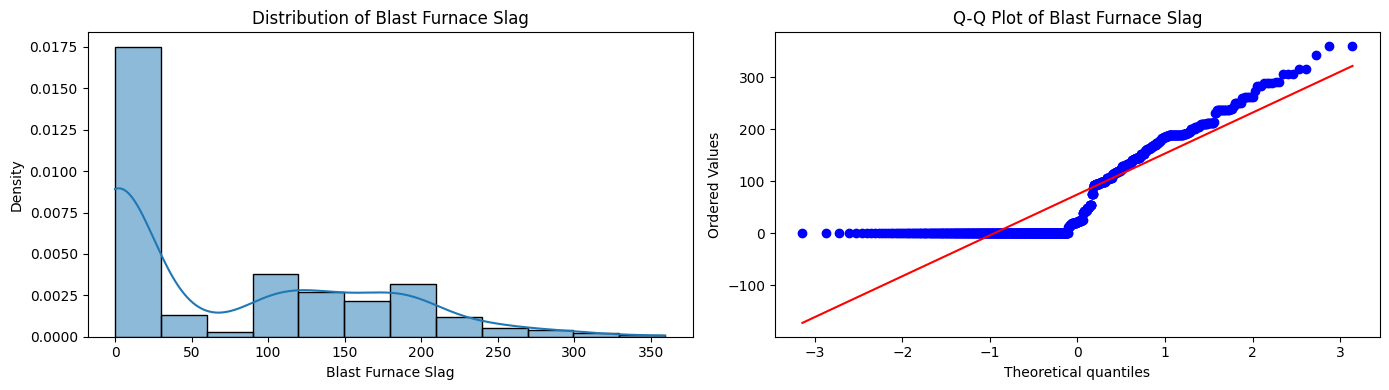

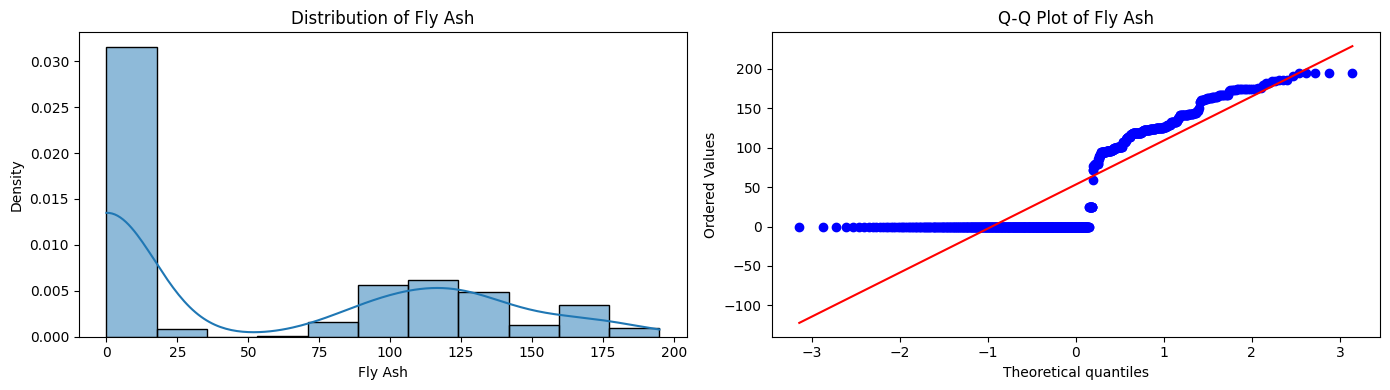

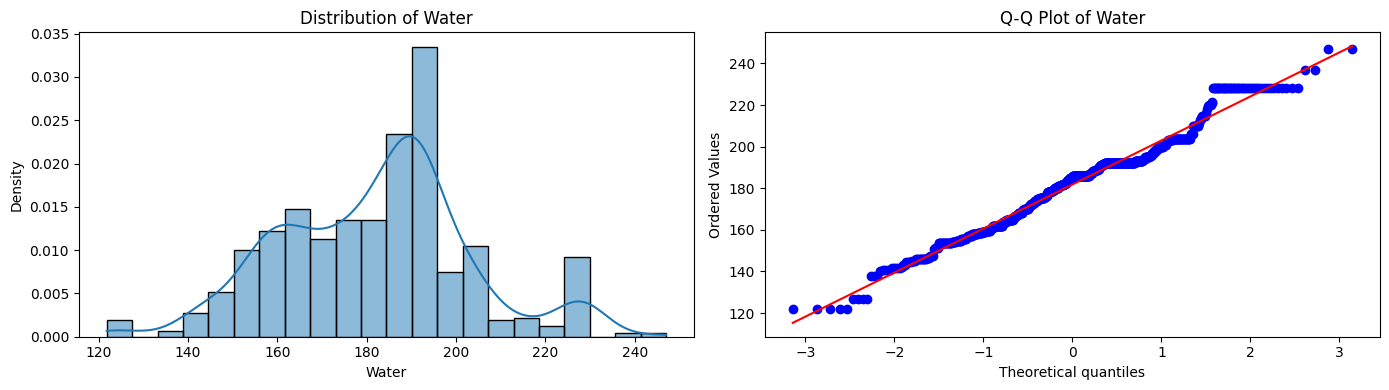

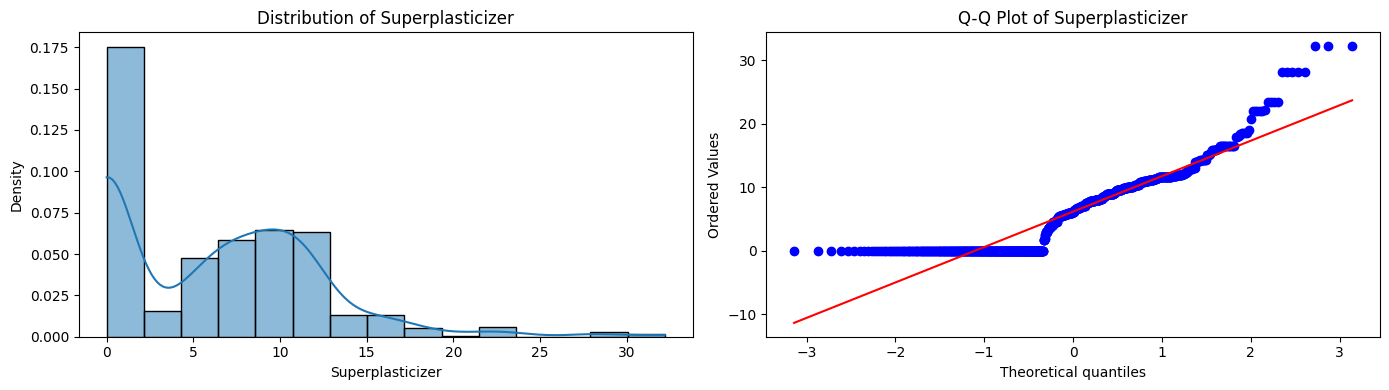

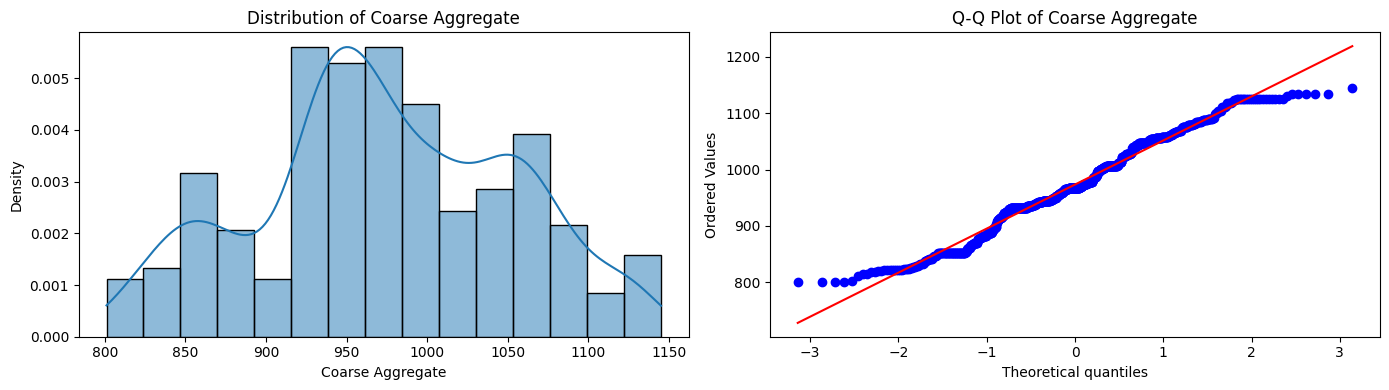

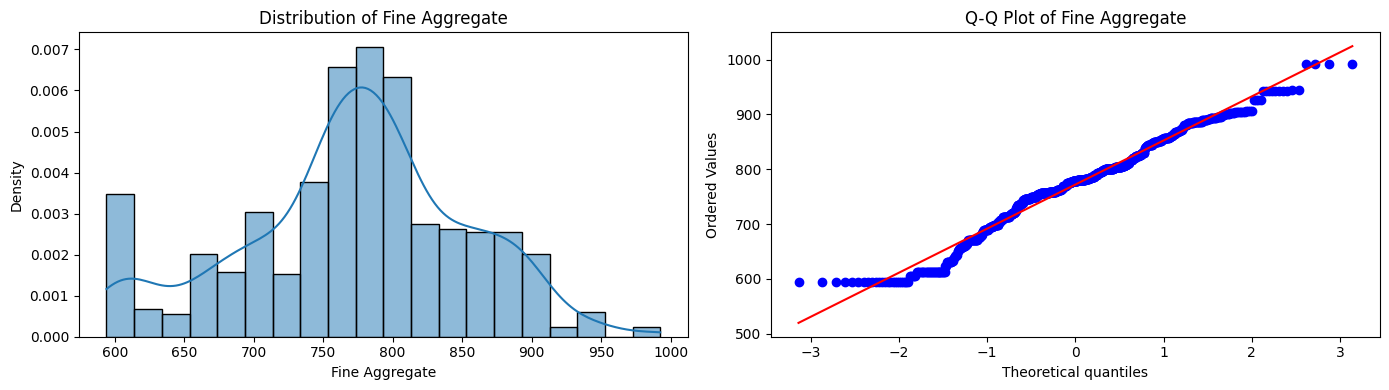

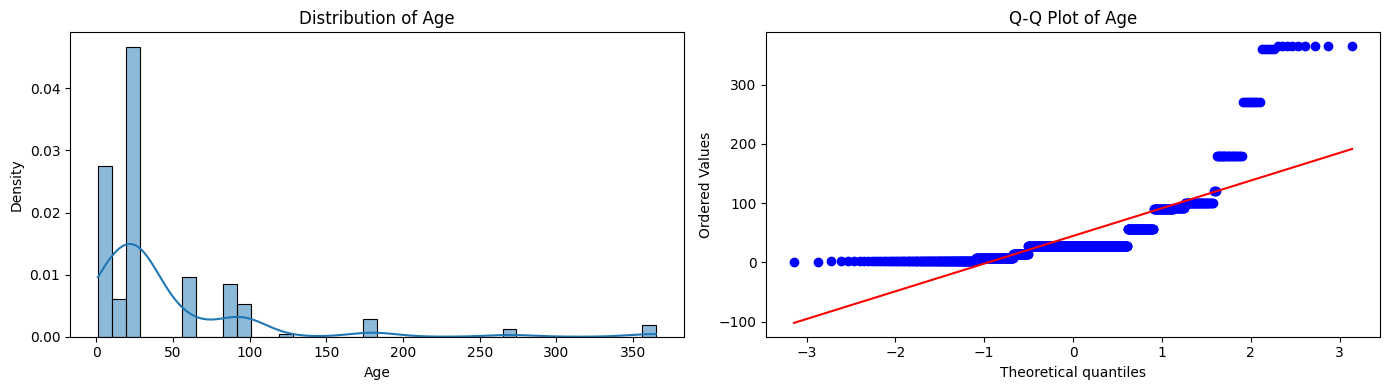

In [12]:
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Histogram + KDE
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, stat="density")
    plt.title(f"Distribution of {col}")

    # Q-Q Plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.tight_layout()
    plt.show()

In [13]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [14]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825001905891

In [15]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537940290385)

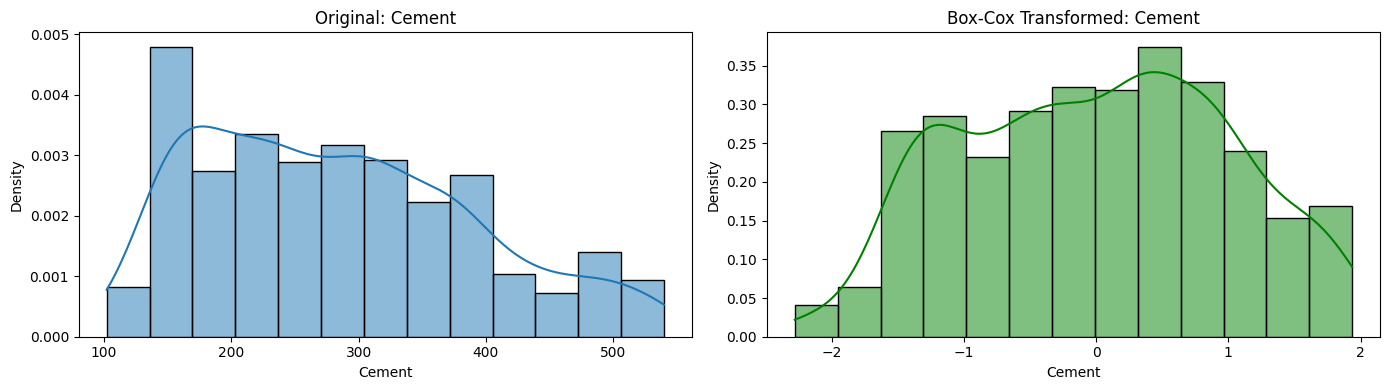

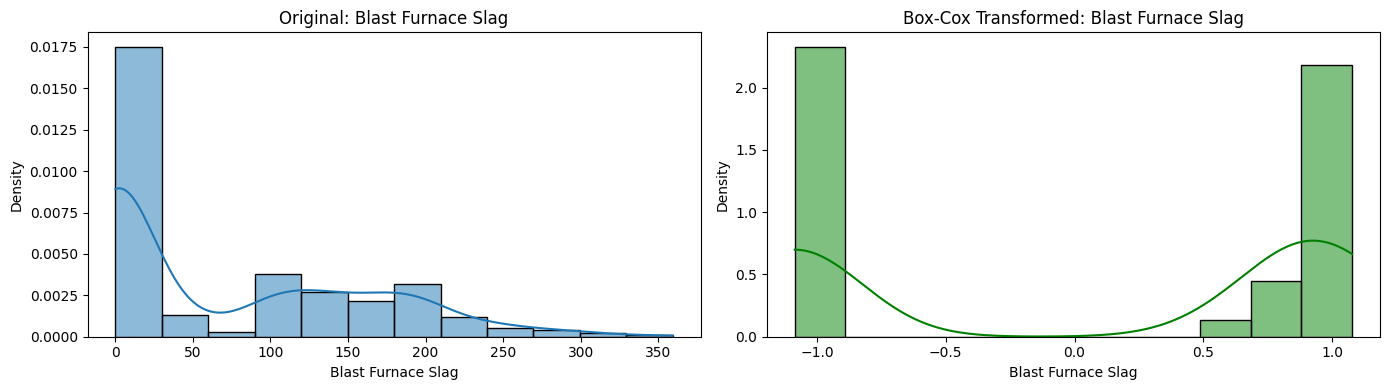

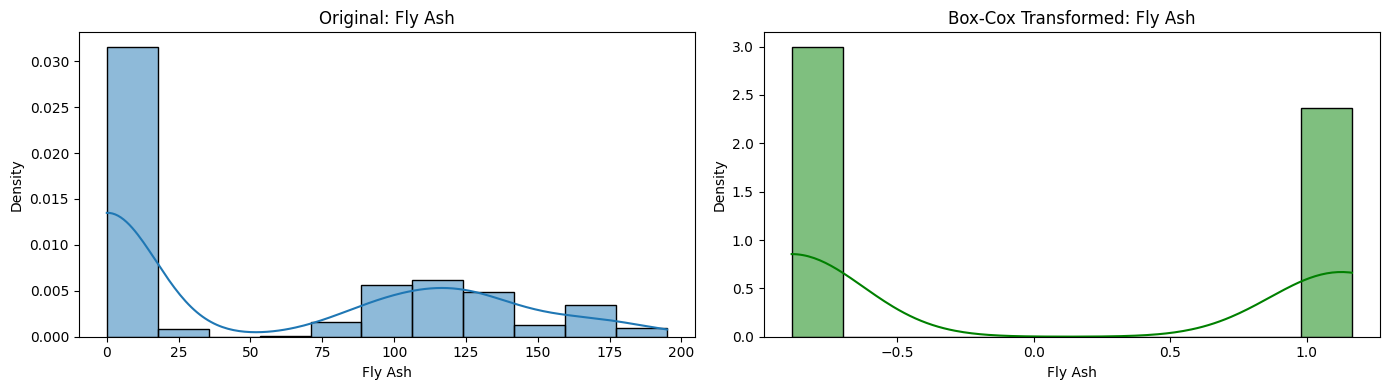

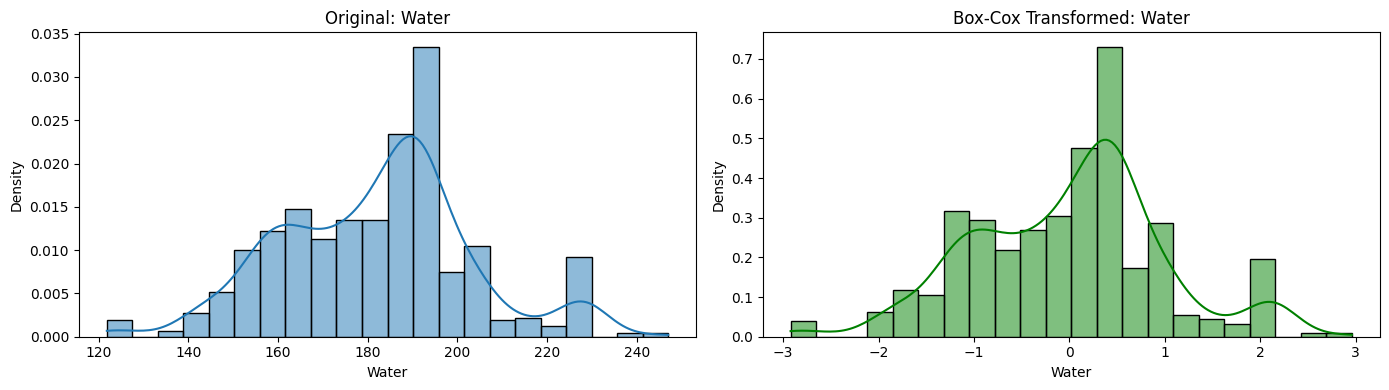

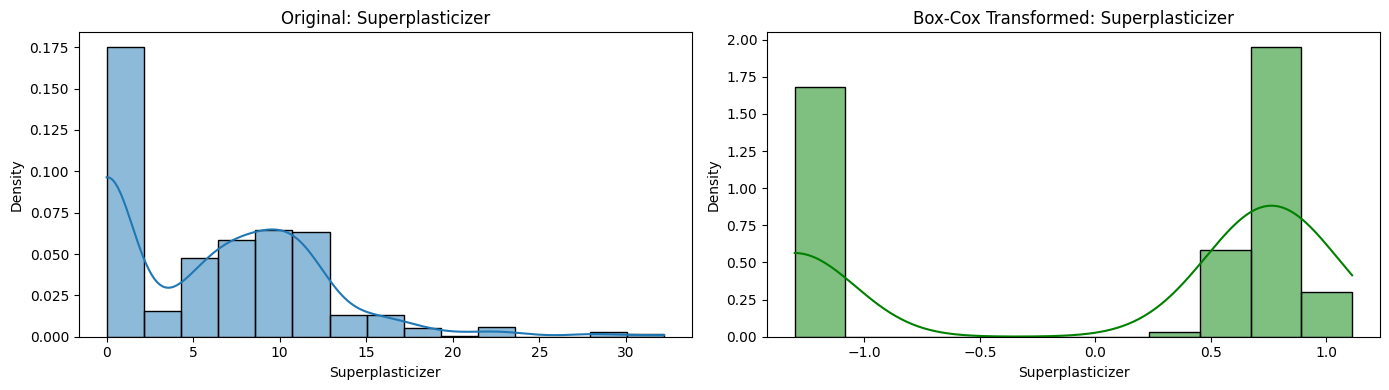

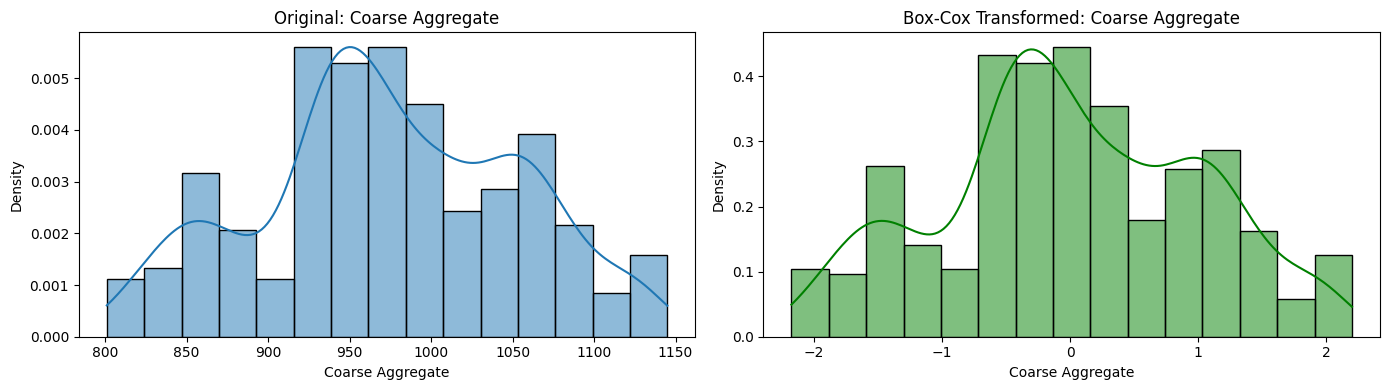

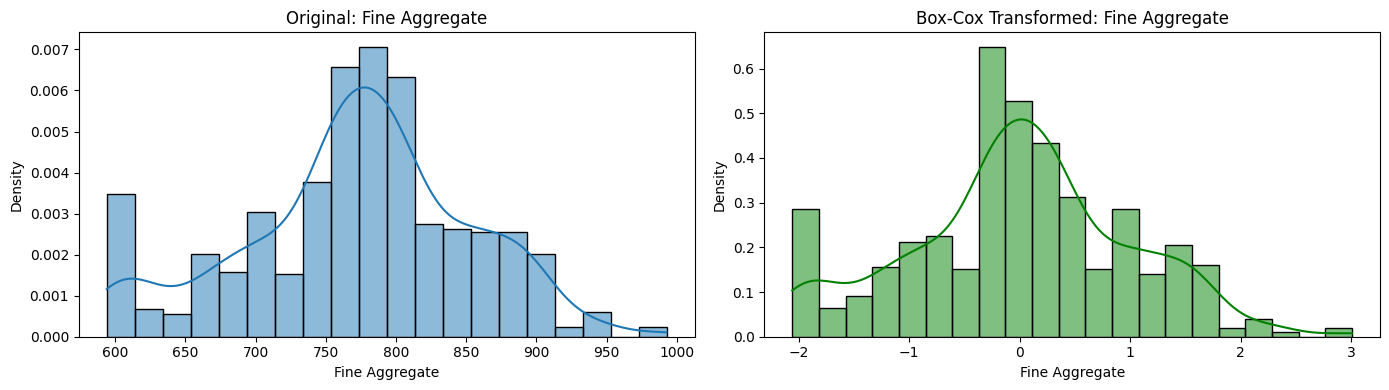

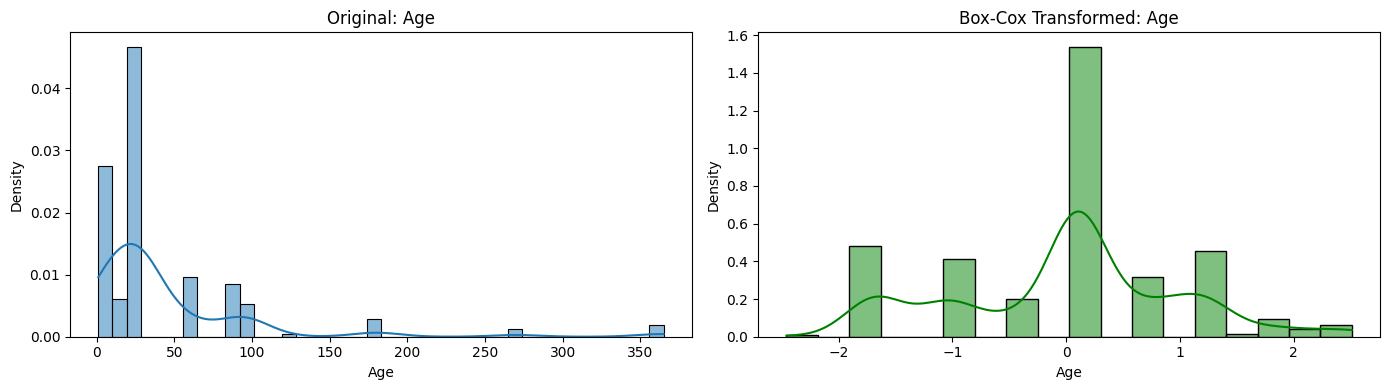

In [17]:
# Convert transformed data back into a DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Plot original vs. Box-Cox transformed distributions
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Original Distribution
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, stat="density")
    plt.title(f"Original: {col}")

    # Transformed Distribution
    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True, stat="density", color='green')
    plt.title(f"Box-Cox Transformed: {col}")

    plt.tight_layout()
    plt.show()

In [18]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906508935355


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [19]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625130236816)

In [20]:

X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

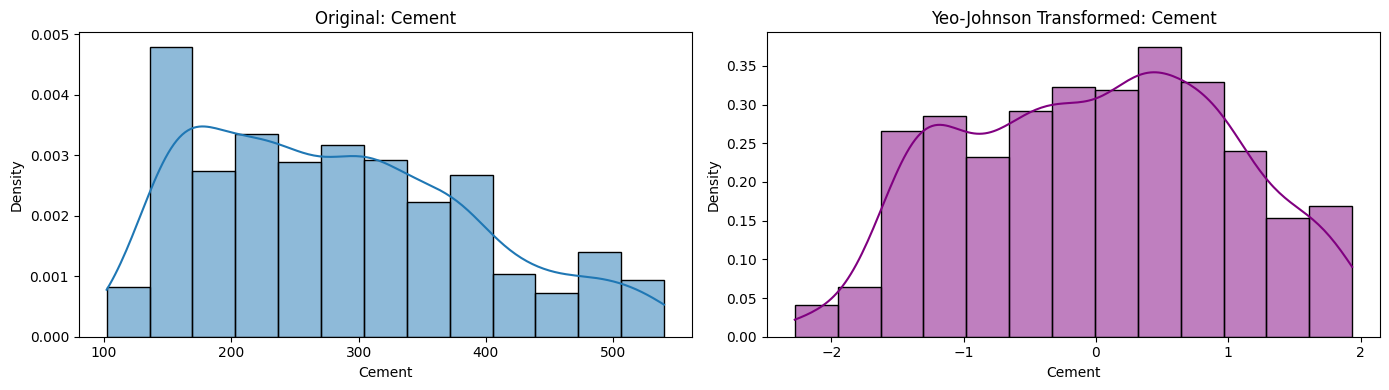

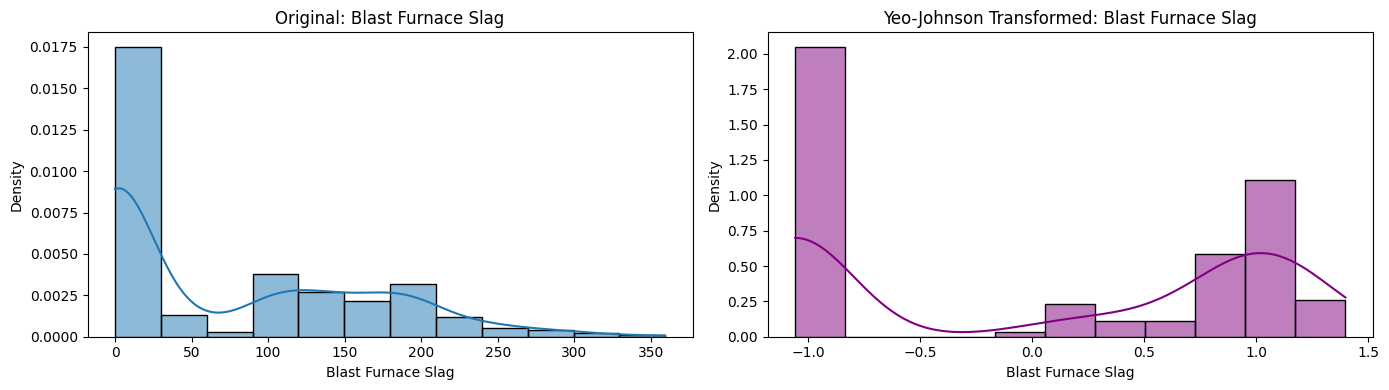

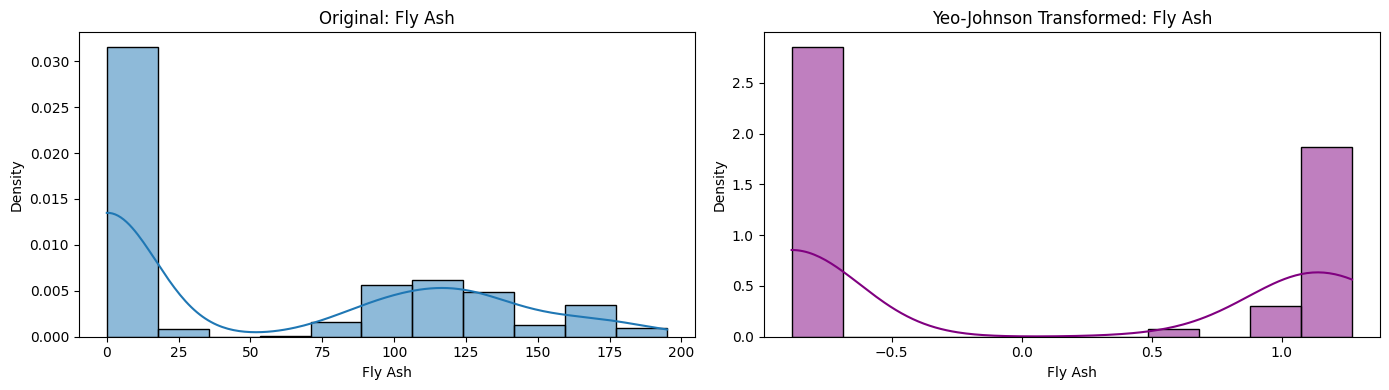

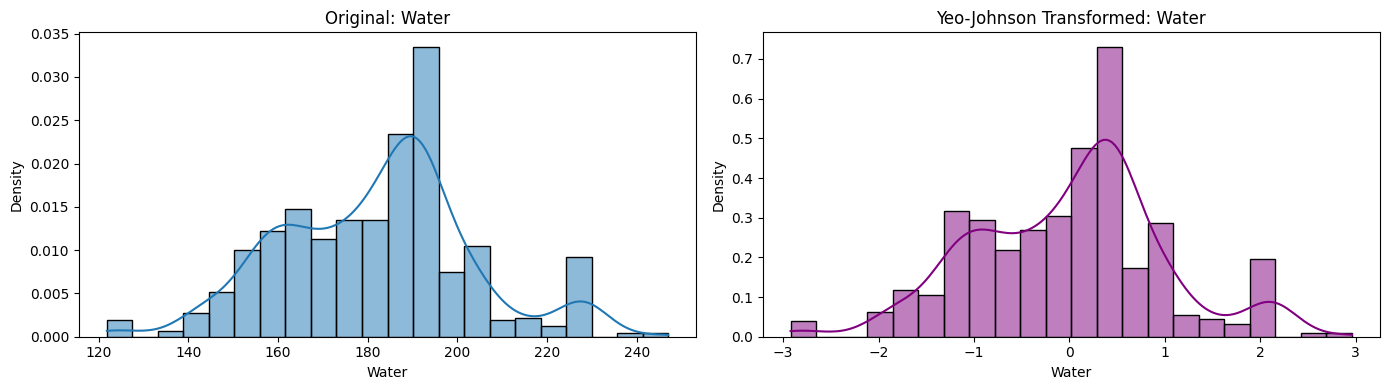

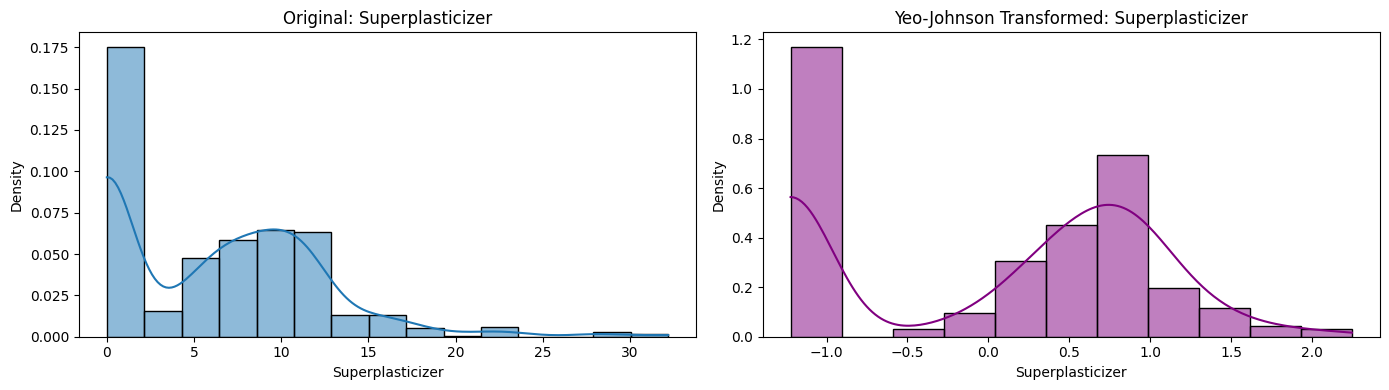

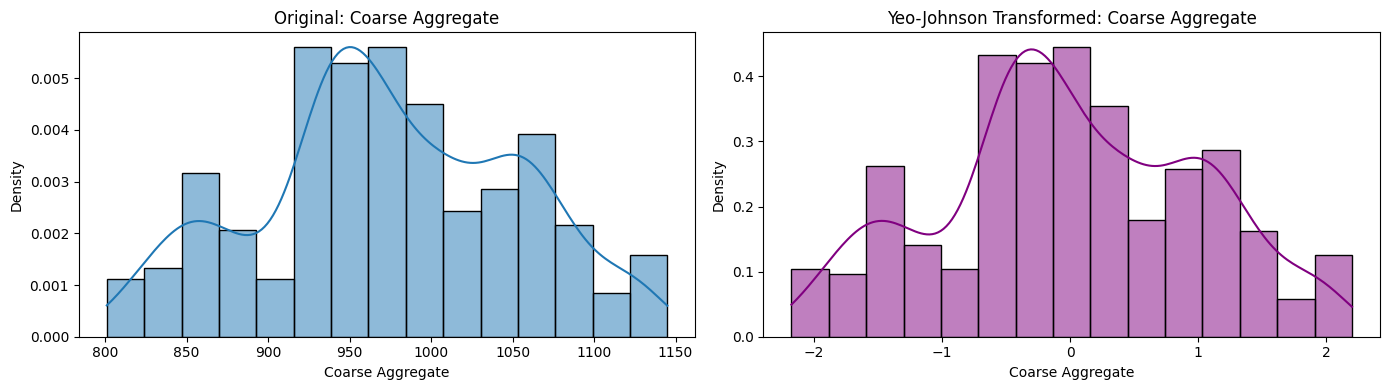

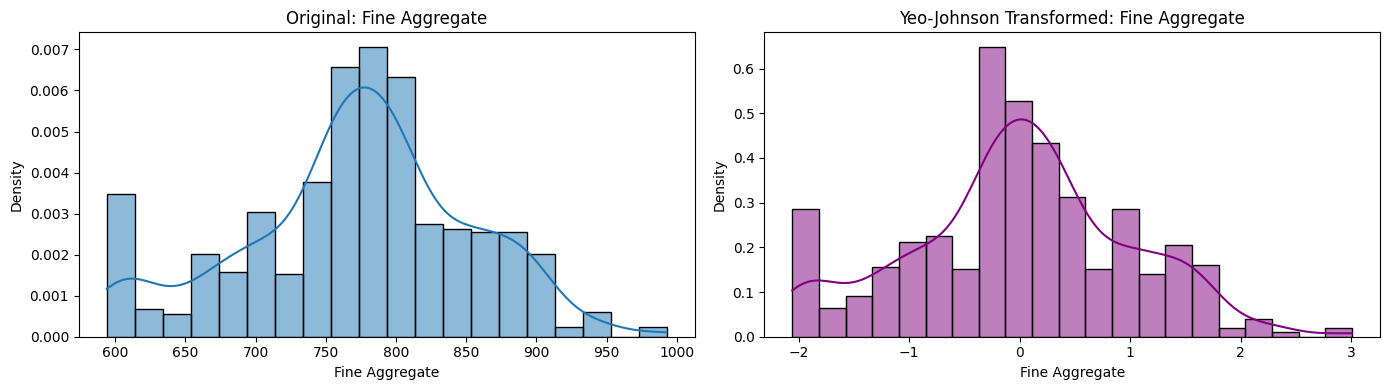

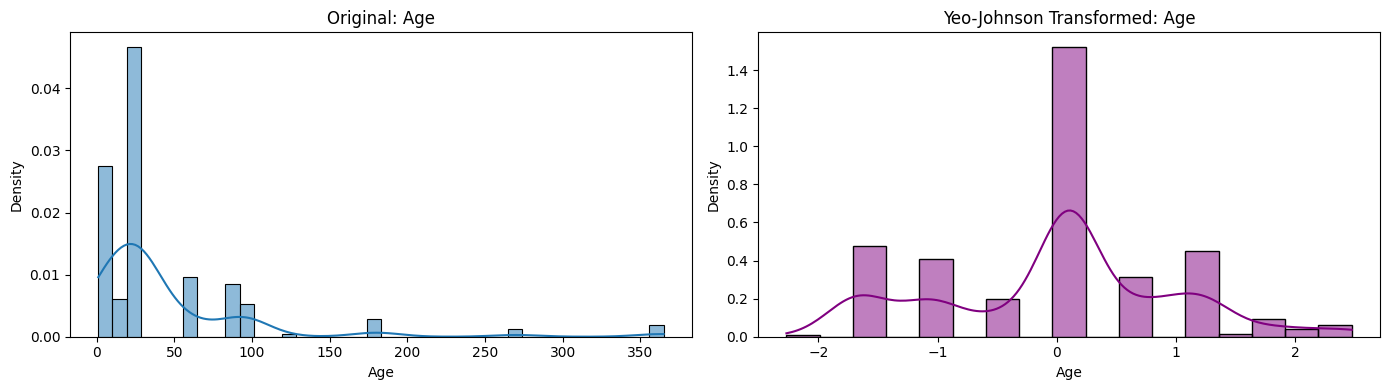

In [21]:
# Ensure the transformed dataframe has the same column names
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

# Plot original vs. Yeo-Johnson transformed distributions
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Original Distribution
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, stat="density")
    plt.title(f"Original: {col}")

    # Transformed Distribution
    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True, stat="density", color='purple')
    plt.title(f"Yeo-Johnson Transformed: {col}")

    plt.tight_layout()
    plt.show()

In [22]:

# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
